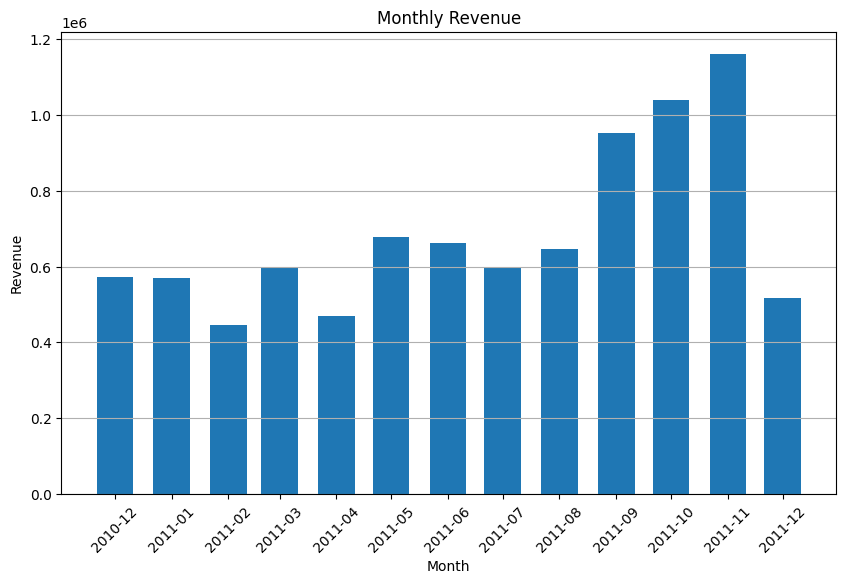

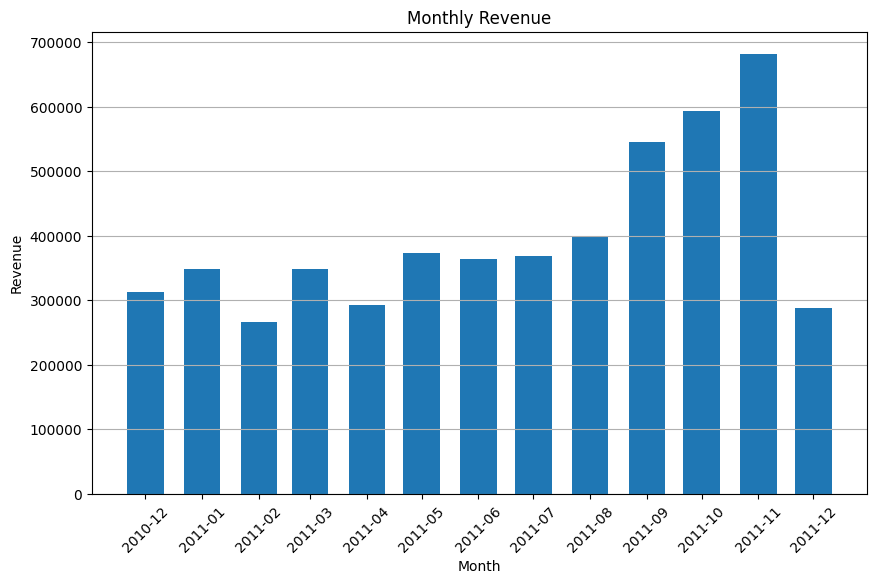

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['YearMonth'] = df['YearMonth'].dt.to_timestamp() 
grouped = df.groupby('YearMonth')
monthly_quantity = grouped['Quantity'].sum()
df['Revenue'] = df['Quantity'] * df['UnitPrice']
monthly_revenue = grouped['Revenue'].sum()
monthly_quantity = grouped['Quantity'].sum()
#print(monthly_quantity)
#print(monthly_revenue)
#df['Quantity'].plot(ylim=[0,10000])
#plt.show()
df.columns.to_list()

plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(monthly_revenue.index, monthly_revenue.index.strftime('%Y-%m'), rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(monthly_quantity.index, monthly_quantity.values, width=20)  
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(monthly_quantity.index, monthly_quantity.index.strftime('%Y-%m'), rotation=45)
plt.grid(axis='y')
plt.show()

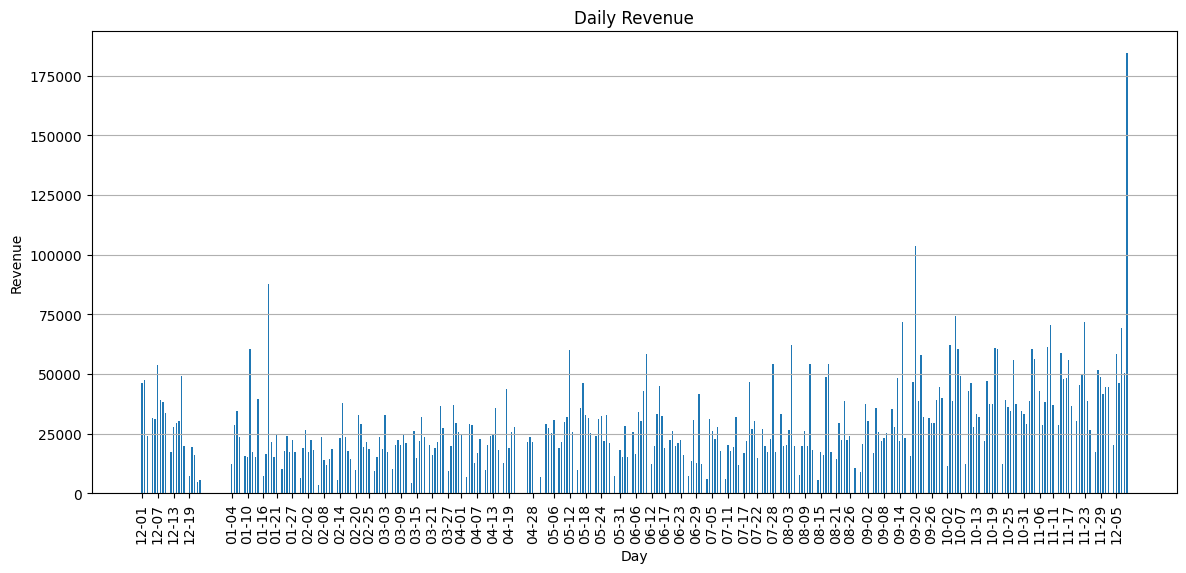

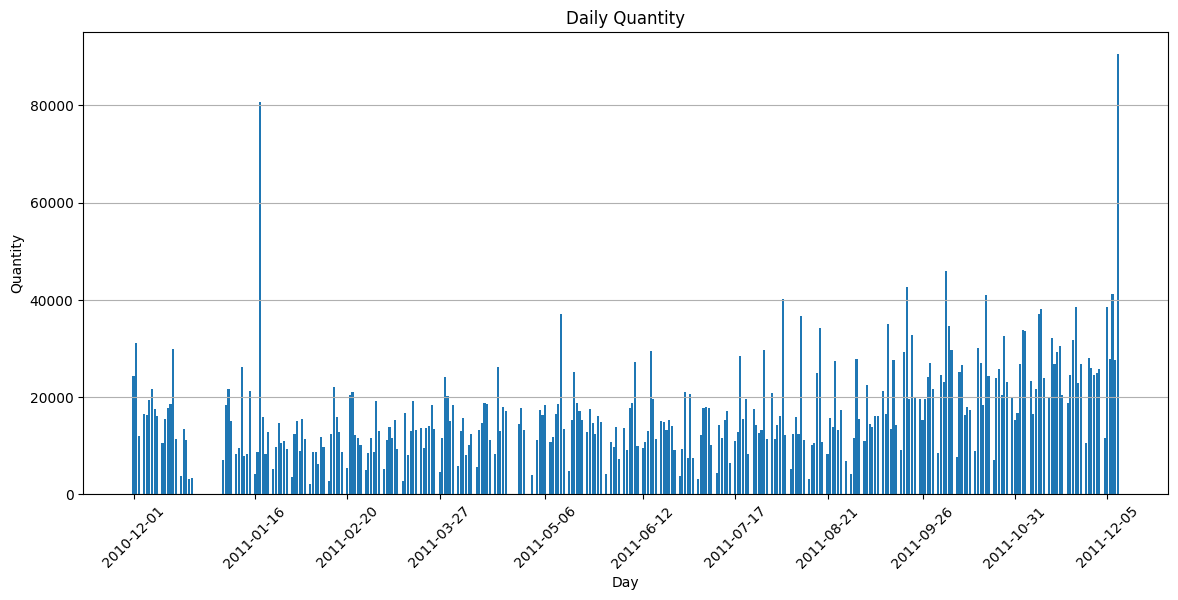

YearMonthDay
2011-12-09    90582
2011-01-18    80618
2011-10-05    45918
2011-09-20    42642
2011-12-07    41102
Name: Quantity, dtype: int64


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonthDay'] = df['InvoiceDate'].dt.to_period('D').dt.to_timestamp()

grouped = df.groupby('YearMonthDay')
df['Revenue'] = df['Quantity'] * df['UnitPrice']
daily_quantity = grouped['Quantity'].sum()
daily_revenue = grouped['Revenue'].sum()


plt.figure(figsize=(14, 6))
plt.bar(daily_revenue.index, daily_revenue.values, width=0.5)  
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.title('Daily Revenue')
plt.xticks(daily_revenue.index[::5], daily_revenue[::5].index.strftime('%m-%d'), rotation=90)  
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(14, 6))
plt.bar(daily_quantity.index, daily_quantity.values, width=0.8)
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.title('Daily Quantity')
plt.xticks(daily_quantity.index[::30], daily_quantity.index[::30].strftime('%Y-%m-%d'), rotation=45)
plt.grid(axis='y')
plt.show()

days_with_max_quantity = daily_quantity.sort_values(ascending=False).head(5)
print(days_with_max_quantity)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonthDay'] = df['InvoiceDate'].dt.to_period('D').dt.to_timestamp()

#grouped = df.groupby('YearMonthDay')
df['Revenue'] = df['Quantity'] * df['UnitPrice']

country_counting = df['Country'].value_counts()
separate_countries = country_counting[country_counting>=800].index.tolist()
print(len(separate_countries)) #count 100 - 28 countries, count 500/600 - 15 countries, count 800/1000 - 11 countries

11


In [6]:
df['Country'] = df['Country'].apply(lambda x: x if x in separate_countries else 'Smaller_countries')

grouped2 = df.groupby(['Country', 'YearMonthDay']).agg({'Quantity':'sum', 'Revenue':'sum'}).reset_index()
print(grouped2.head())
sales_days_count = grouped2.groupby('Country')['YearMonthDay'].nunique()

print(sales_days_count)


     Country YearMonthDay  Quantity  Revenue
0  Australia   2010-12-01       107   358.25
1  Australia   2010-12-08       214   258.90
2  Australia   2010-12-17       146   415.70
3  Australia   2011-01-06      4802  7154.38
4  Australia   2011-01-10        96    81.60
Country
Australia             44
Belgium               83
EIRE                 154
France               205
Germany              201
Netherlands           63
Norway                30
Portugal              47
Smaller_countries    173
Spain                 76
Switzerland           47
United Kingdom       305
Name: YearMonthDay, dtype: int64


In [7]:
grouped2['day_of_week'] = grouped2['YearMonthDay'].dt.dayofweek
grouped2['month'] = grouped2['YearMonthDay'].dt.month
grouped2['day_of_month'] = grouped2['YearMonthDay'].dt.day
grouped2['is_weekend'] = (grouped2['day_of_week'] >= 5).astype(int)

grouped2['is_christmas'] = ((grouped2['YearMonthDay'].dt.month == 12) & 
                            (grouped2['YearMonthDay'].dt.day == 25)).astype(int) #not relevant, im not exporting on christmas

grouped2['is_black_friday'] = ((grouped2['YearMonthDay'].dt.month == 11) & 
                               (grouped2['YearMonthDay'].dt.day >= 23) &
                               (grouped2['YearMonthDay'].dt.day <= 29) &
                               (grouped2['day_of_week'] == 4)).astype(int)  #not selling as well


In [8]:
weekend_stats = grouped2.groupby(['Country', 'is_weekend'])['Quantity'].mean().unstack()
print(weekend_stats)

black_friday_stats = grouped2.groupby(['Country', 'is_black_friday'])['Quantity'].mean().unstack()
print(black_friday_stats)

christmas_stats = grouped2.groupby(['Country', 'is_christmas'])['Quantity'].mean().unstack()
print(christmas_stats)

day_stats = grouped2.groupby(['Country', 'day_of_week'])['Quantity'].mean().unstack()
print(day_stats)

print(grouped2['day_of_week'].unique())


is_weekend                    0            1
Country                                     
Australia           2031.707317   303.000000
Belgium              280.961538   264.400000
EIRE                 919.330935   849.200000
France               572.788889   334.800000
Germany              599.770492   528.055556
Netherlands         3214.163934  2436.500000
Norway               661.793103   146.000000
Portugal             340.111111   408.500000
Smaller_countries    801.969136   833.454545
Spain                356.826087   475.714286
Switzerland          598.613636  1248.000000
United Kingdom     15129.098039  8231.040000
is_black_friday               0        1
Country                                 
Australia           1913.840909      NaN
Belgium              279.963855      NaN
EIRE                 917.862745     92.0
France               542.372549    828.0
Germany              596.090000     45.0
Netherlands         3189.476190      NaN
Norway               646.344828    594.0
P

In [9]:
total_sales_per_day = grouped2.groupby('YearMonthDay')['Quantity'].sum()
top_sales_days = total_sales_per_day.sort_values(ascending=False).head(20)

print(top_sales_days)

YearMonthDay
2011-12-09    90582
2011-01-18    80618
2011-10-05    45918
2011-09-20    42642
2011-12-07    41102
2011-10-20    40897
2011-08-04    40097
2011-12-05    38428
2011-11-23    38412
2011-11-10    38112
2011-05-12    37149
2011-11-09    37018
2011-08-11    36710
2011-09-13    35029
2011-10-06    34581
2011-08-18    34077
2011-11-03    33737
2011-11-04    33620
2011-09-22    32816
2011-10-27    32557
Name: Quantity, dtype: int64


In [10]:
#after the previous observation we add one more feature 'special_day' for the days where there is a large amount of sales

special_days = ['2011-12-09', '2011-01-18']
grouped2['is_special_day'] = grouped2['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)

In [ ]:
#error debugging
countries = grouped2['Country'].dropna().unique()
print(countries)  
future_dates = pd.date_range(
    start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1),
    periods=90
)

future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)
print(future.shape)  
print(future.head())
print('Countries:', countries)
print('Future Dates:', future_dates)


['Australia' 'Belgium' 'EIRE' 'France' 'Germany' 'Netherlands' 'Norway'
 'Portugal' 'Smaller_countries' 'Spain' 'Switzerland' 'United Kingdom']
(1080, 2)
     Country YearMonthDay
0  Australia   2011-12-10
1  Australia   2011-12-11
2  Australia   2011-12-12
3  Australia   2011-12-13
4  Australia   2011-12-14
Countries: ['Australia' 'Belgium' 'EIRE' 'France' 'Germany' 'Netherlands' 'Norway'
 'Portugal' 'Smaller_countries' 'Spain' 'Switzerland' 'United Kingdom']
Future Dates: DatetimeIndex(['2011-12-10', '2011-12-11', '2011-12-12', '2011-12-13',
               '2011-12-14', '2011-12-15', '2011-12-16', '2011-12-17',
               '2011-12-18', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-24', '2011-12-25',
               '2011-12-26', '2011-12-27', '2011-12-28', '2011-12-29',
               '2011-12-30', '2011-12-31', '2012-01-01', '2012-01-02',
               '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-

In [1]:
import xgboost as xgb
print(xgb.__version__)


2.0.3


[0]	validation_0-rmse:6425.00594
[1]	validation_0-rmse:6176.84166
[2]	validation_0-rmse:5935.09422
[3]	validation_0-rmse:5707.25240
[4]	validation_0-rmse:5512.28511
[5]	validation_0-rmse:5303.93128
[6]	validation_0-rmse:5309.32914
[7]	validation_0-rmse:5164.19726
[8]	validation_0-rmse:4999.08727
[9]	validation_0-rmse:4843.86759
[10]	validation_0-rmse:4703.50873
[11]	validation_0-rmse:4572.89628
[12]	validation_0-rmse:4445.75879
[13]	validation_0-rmse:4318.71070
[14]	validation_0-rmse:4325.26381
[15]	validation_0-rmse:4211.03301
[16]	validation_0-rmse:4113.93208
[17]	validation_0-rmse:3996.71375
[18]	validation_0-rmse:3921.40240
[19]	validation_0-rmse:3923.98276
[20]	validation_0-rmse:3845.62034
[21]	validation_0-rmse:3780.53989
[22]	validation_0-rmse:3706.39212
[23]	validation_0-rmse:3636.81361
[24]	validation_0-rmse:3578.97115
[25]	validation_0-rmse:3506.99958
[26]	validation_0-rmse:3455.30680
[27]	validation_0-rmse:3399.00822
[28]	validation_0-rmse:3351.47848
[29]	validation_0-rmse:3

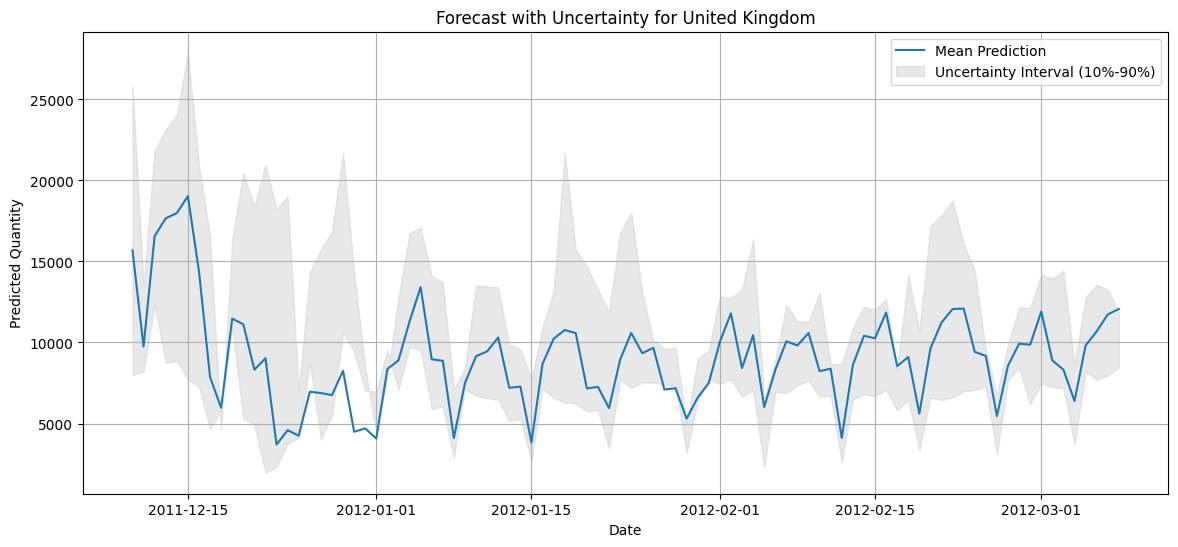

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split


file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonthDay'] = df['InvoiceDate'].dt.to_period('D').dt.to_timestamp()
df['Revenue'] = df['Quantity'] * df['UnitPrice']


country_counts = df['Country'].value_counts()
separate_countries = country_counts[country_counts >= 1000].index.tolist()
df['Country'] = df['Country'].apply(lambda x: x if x in separate_countries else 'Smaller_countries')

grouped2 = df.groupby(['Country', 'YearMonthDay']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

special_days = ['2011-12-09', '2011-01-18']  
grouped2['day_of_week'] = grouped2['YearMonthDay'].dt.dayofweek
grouped2['month'] = grouped2['YearMonthDay'].dt.month
grouped2['day_of_month'] = grouped2['YearMonthDay'].dt.day
grouped2['is_special_day'] = grouped2['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)

le = LabelEncoder()
grouped2['Country_encoded'] = le.fit_transform(grouped2['Country'])

features = ['Country_encoded', 'day_of_week', 'month', 'day_of_month', 'is_special_day']
X = grouped2[features]
y = grouped2['Quantity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

params_mean = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 400,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': 'rmse',
    'callbacks': [xgb.callback.EarlyStopping(rounds=30)]
}
model = xgb.XGBRegressor(**params_mean)
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

params_lower = {
    'objective': 'reg:quantileerror',
    'quantile_alpha': 0.1,
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 400,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
model_lower = xgb.XGBRegressor(**params_lower)
model_lower.fit(X_train, y_train, verbose=True)

params_upper = {
    'objective': 'reg:quantileerror',
    'quantile_alpha': 0.9,
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 400,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
model_upper = xgb.XGBRegressor(**params_upper)
model_upper.fit(X_train, y_train, verbose=True)

future_dates = pd.date_range(
    start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1),
    periods=90
)

countries = grouped2['Country'].dropna().unique()
future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)

future['day_of_week'] = future['YearMonthDay'].dt.dayofweek
future['month'] = future['YearMonthDay'].dt.month
future['day_of_month'] = future['YearMonthDay'].dt.day
future['is_special_day'] = future['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
future['Country_encoded'] = le.transform(future['Country'])

X_future = future[features]

future['Predicted_Quantity'] = model.predict(X_future)
future['Predicted_Lower'] = model_lower.predict(X_future)
future['Predicted_Upper'] = model_upper.predict(X_future)

future['Predicted_Quantity'] = future['Predicted_Quantity'].clip(lower=0)
future['Predicted_Lower'] = future['Predicted_Lower'].clip(lower=0)
future['Predicted_Upper'] = future['Predicted_Upper'].clip(lower=0)

print(future[['Country', 'YearMonthDay', 'Predicted_Quantity', 'Predicted_Lower', 'Predicted_Upper']].head())
future['YearMonth'] = future['YearMonthDay'].dt.to_period('M')

forecast_monthly = future.groupby(['Country', 'YearMonth']).agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum'
}).reset_index()

print(forecast_monthly)

country_to_plot = 'United Kingdom'  

plot_data = future[future['Country'] == country_to_plot]

plt.figure(figsize=(14,6))
plt.plot(plot_data['YearMonthDay'], plot_data['Predicted_Quantity'], label='Mean Prediction')
plt.fill_between(plot_data['YearMonthDay'],
                 plot_data['Predicted_Lower'],
                 plot_data['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Uncertainty Interval (10%-90%)')
plt.title(f"Forecast with Uncertainty for {country_to_plot}")
plt.xlabel('Date')
plt.ylabel('Predicted Quantity')
plt.legend()
plt.grid()
plt.show()


#future.to_csv('daily_forecast_with_uncertainty.csv', index=False)
#forecast_monthly.to_csv('monthly_forecast_with_uncertainty.csv', index=False)


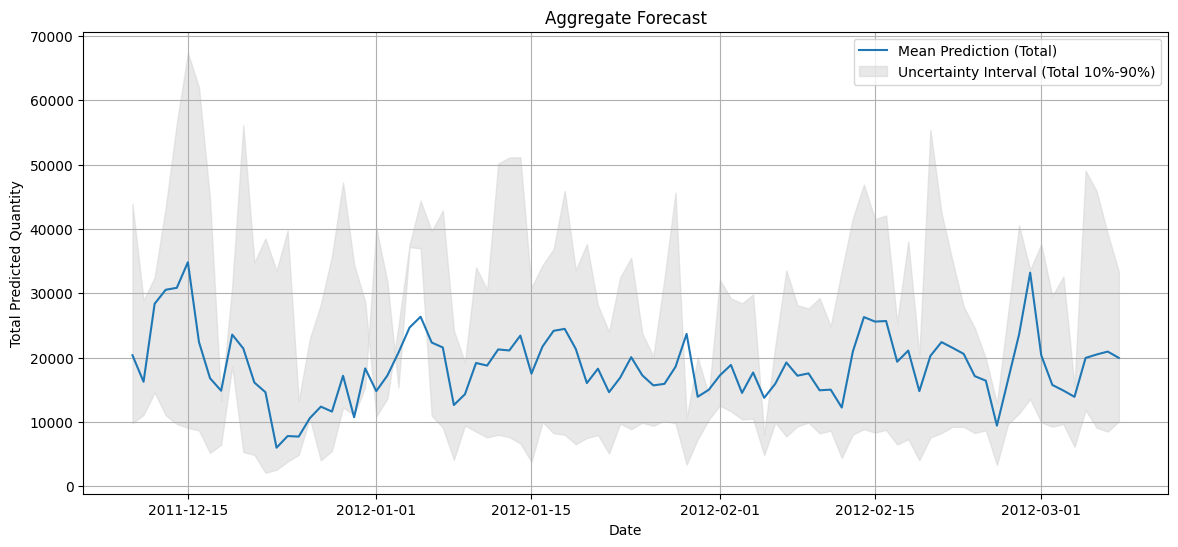

In [53]:
total_future = future.groupby('YearMonthDay').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum'
}).reset_index()

plt.figure(figsize=(14,6))
plt.plot(total_future['YearMonthDay'], total_future['Predicted_Quantity'], label='Mean Prediction (Total)')
plt.fill_between(total_future['YearMonthDay'],
                 total_future['Predicted_Lower'],
                 total_future['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Uncertainty Interval (Total 10%-90%)')
plt.title("Aggregate Forecast")
plt.xlabel('Date')

plt.ylabel('Total Predicted Quantity')
plt.legend()
plt.grid()
plt.show()


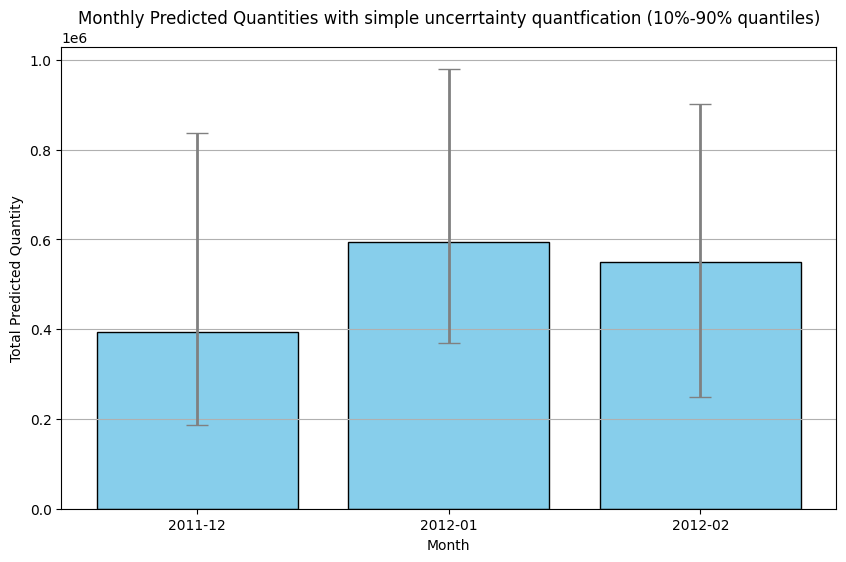

In [52]:
future['YearMonth'] = future['YearMonthDay'].dt.to_period('M')
monthly_total = future.groupby('YearMonth').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum'
}).reset_index()

months_of_interest = ['2011-12', '2012-01', '2012-02']
monthly_total = monthly_total[monthly_total['YearMonth'].astype(str).isin(months_of_interest)]
monthly_total['error_upper'] = monthly_total['Predicted_Upper'] - monthly_total['Predicted_Quantity']
monthly_total['error_lower'] = monthly_total['Predicted_Quantity'] - monthly_total['Predicted_Lower']

plt.figure(figsize=(10,6))
plt.bar(
    monthly_total['YearMonth'].astype(str),
    monthly_total['Predicted_Quantity'],
    yerr=[monthly_total['error_lower'], monthly_total['error_upper']],
    capsize=8,
    color='skyblue',
    edgecolor='black',
    error_kw=dict(ecolor='gray', lw=2)
)

plt.title('Monthly Predicted Quantities with simple uncerrtainty quantfication (10%-90% quantiles)')
plt.xlabel('Month')
plt.ylabel('Total Predicted Quantity')
plt.grid(axis='y')
plt.show()


[0]	validation_0-rmse:6878.67625
[1]	validation_0-rmse:6469.78319
[2]	validation_0-rmse:6047.62412
[3]	validation_0-rmse:5721.23177
[4]	validation_0-rmse:5418.47666
[5]	validation_0-rmse:5184.31415
[6]	validation_0-rmse:4956.66992
[7]	validation_0-rmse:4759.58303
[8]	validation_0-rmse:4546.08403
[9]	validation_0-rmse:4414.98651
[10]	validation_0-rmse:4262.77217
[11]	validation_0-rmse:4149.76514
[12]	validation_0-rmse:4083.37512
[13]	validation_0-rmse:4005.31189
[14]	validation_0-rmse:3929.80235
[15]	validation_0-rmse:3849.64010
[16]	validation_0-rmse:3771.83299
[17]	validation_0-rmse:3710.63795
[18]	validation_0-rmse:3664.80933
[19]	validation_0-rmse:3617.12014
[20]	validation_0-rmse:3585.00262
[21]	validation_0-rmse:3566.50270
[22]	validation_0-rmse:3564.74930
[23]	validation_0-rmse:3552.73679
[24]	validation_0-rmse:3555.79684
[25]	validation_0-rmse:3548.93769
[26]	validation_0-rmse:3514.39844
[27]	validation_0-rmse:3512.79997
[28]	validation_0-rmse:3510.62536
[29]	validation_0-rmse:3

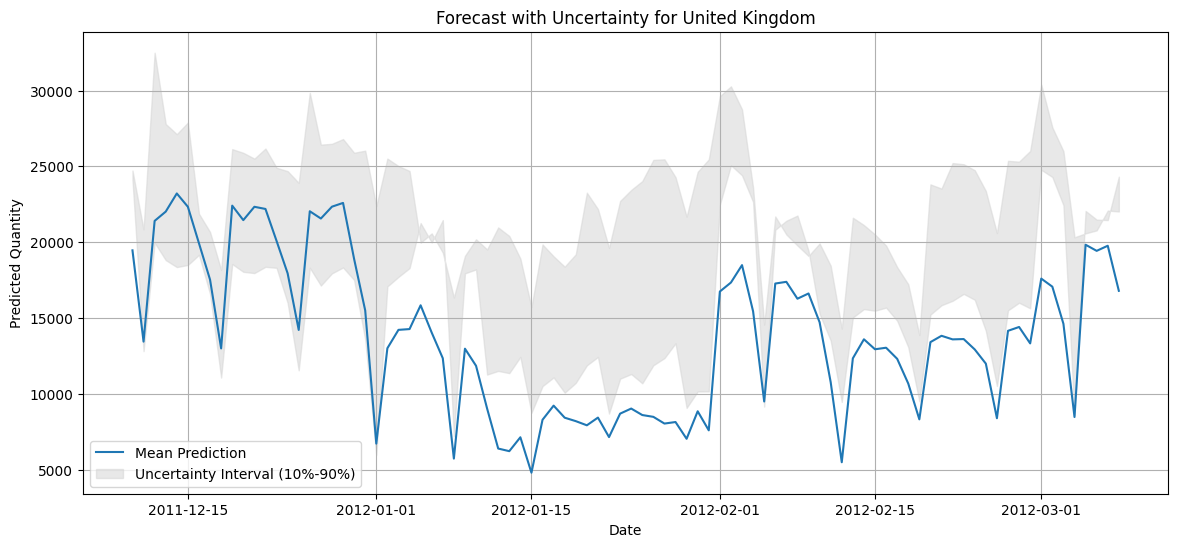

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split

file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonthDay'] = df['InvoiceDate'].dt.to_period('D').dt.to_timestamp()
df['Revenue'] = df['Quantity'] * df['UnitPrice']

country_counts = df['Country'].value_counts()
separate_countries = country_counts[country_counts >= 1000].index.tolist()
df['Country'] = df['Country'].apply(lambda x: x if x in separate_countries else 'Smaller_countries')

grouped2 = df.groupby(['Country', 'YearMonthDay']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

special_days = ['2011-12-09', '2011-01-18']
grouped2['day_of_week'] = grouped2['YearMonthDay'].dt.dayofweek
grouped2['month'] = grouped2['YearMonthDay'].dt.month
grouped2['day_of_month'] = grouped2['YearMonthDay'].dt.day
grouped2['is_special_day'] = grouped2['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
grouped2['is_weekend'] = (grouped2['day_of_week'] >= 5).astype(int)
grouped2['days_until_end_of_month'] = grouped2['YearMonthDay'].apply(lambda x: (x + pd.offsets.MonthEnd(0)).day - x.day)
grouped2['is_start_of_month'] = (grouped2['day_of_month'] <= 5).astype(int)

grouped2['previous_day_quantity'] = grouped2.groupby('Country')['Quantity'].shift(1)
grouped2['previous_week_quantity'] = grouped2.groupby('Country')['Quantity'].shift(7)

# Rolling Mean Feature
grouped2['rolling_mean_7days'] = grouped2.groupby('Country')['Quantity'].shift(1).rolling(7).mean()
grouped2 = grouped2.dropna().reset_index(drop=True)

le = LabelEncoder()
grouped2['Country_encoded'] = le.fit_transform(grouped2['Country'])

features = [
    'Country_encoded', 'day_of_week', 'month', 'day_of_month', 'is_special_day',
    'is_weekend', 'days_until_end_of_month', 'is_start_of_month',
    'previous_day_quantity', 'previous_week_quantity', 'rolling_mean_7days'
]
X = grouped2[features]
y = grouped2['Quantity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

params_mean = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': 'rmse',
    'callbacks':None #[xgb.callback.EarlyStopping(rounds=30)]
}
model = xgb.XGBRegressor(**params_mean)
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)
params_lower = {
    'objective': 'reg:quantileerror',
    'quantile_alpha': 0.1,
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
model_lower = xgb.XGBRegressor(**params_lower)
model_lower.fit(X_train, y_train, verbose=True)

params_upper = {
    'objective': 'reg:quantileerror',
    'quantile_alpha': 0.9,
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
model_upper = xgb.XGBRegressor(**params_upper)
model_upper.fit(X_train, y_train, verbose=True)
future_dates = pd.date_range(
    start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1),
    periods=90
)

countries = grouped2['Country'].dropna().unique()

future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)
future['day_of_week'] = future['YearMonthDay'].dt.dayofweek
future['month'] = future['YearMonthDay'].dt.month
future['day_of_month'] = future['YearMonthDay'].dt.day
future['is_special_day'] = future['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
future['is_weekend'] = (future['day_of_week'] >= 5).astype(int)
future['days_until_end_of_month'] = future['YearMonthDay'].apply(lambda x: (x + pd.offsets.MonthEnd(0)).day - x.day)
future['is_start_of_month'] = (future['day_of_month'] <= 5).astype(int)
future['Country_encoded'] = le.transform(future['Country'])
last_known = grouped2.groupby('Country').last().reset_index()
future = future.merge(last_known[['Country', 'Quantity', 'rolling_mean_7days']], on='Country', how='left')
future['previous_day_quantity'] = future['Quantity']
future['previous_week_quantity'] = future['Quantity']

future = future.drop(columns=['Quantity'])

X_future = future[features]

future['Predicted_Quantity'] = model.predict(X_future)
future['Predicted_Lower'] = model_lower.predict(X_future)
future['Predicted_Upper'] = model_upper.predict(X_future)
future['Predicted_Quantity'] = future['Predicted_Quantity'].clip(lower=0)
future['Predicted_Lower'] = future['Predicted_Lower'].clip(lower=0)
future['Predicted_Upper'] = future['Predicted_Upper'].clip(lower=0)

print(future[['Country', 'YearMonthDay', 'Predicted_Quantity', 'Predicted_Lower', 'Predicted_Upper']].head())

future['YearMonth'] = future['YearMonthDay'].dt.to_period('M')
forecast_monthly = future.groupby(['Country', 'YearMonth']).agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum'
}).reset_index()

print(forecast_monthly)

country_to_plot = 'United Kingdom'
plot_data = future[future['Country'] == country_to_plot]
plt.figure(figsize=(14,6))
plt.plot(plot_data['YearMonthDay'], plot_data['Predicted_Quantity'], label='Mean Prediction')
plt.fill_between(plot_data['YearMonthDay'],
                 plot_data['Predicted_Lower'],
                 plot_data['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Uncertainty Interval (10%-90%)')
plt.title(f"Forecast with Uncertainty for {country_to_plot}")
plt.xlabel('Date')
plt.ylabel('Predicted Quantity')
plt.legend()
plt.grid()
plt.show()

#future.to_csv('daily_forecast_with_uncertainty.csv', index=False)
#forecast_monthly.to_csv('monthly_forecast_with_uncertainty.csv', index=False)


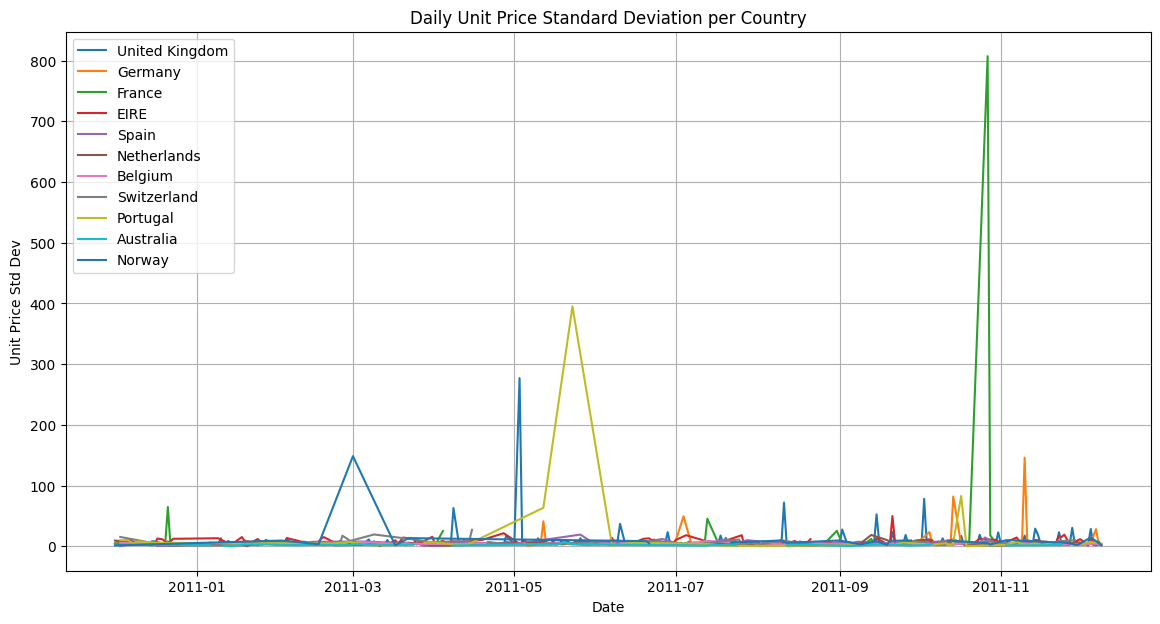

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonthDay'] = df['InvoiceDate'].dt.to_period('D').dt.to_timestamp()
df['Revenue'] = df['Quantity'] * df['UnitPrice']
country_counting = df['Country'].value_counts()
separate_countries = country_counting[country_counting >= 800].index.tolist()

df = df[df['Country'].isin(separate_countries)]
price_variation = df.groupby(['Country', 'YearMonthDay']).agg({
    'UnitPrice': ['mean', 'std']
}).reset_index()

price_variation.columns = ['Country', 'YearMonthDay', 'UnitPrice_Mean', 'UnitPrice_Std']
plt.figure(figsize=(14, 7))

for country in separate_countries:
    subset = price_variation[price_variation['Country'] == country]
    plt.plot(subset['YearMonthDay'], subset['UnitPrice_Std'], label=country)

plt.title('Daily Unit Price Standard Deviation per Country')
plt.xlabel('Date')
plt.ylabel('Unit Price Std Dev')
plt.legend()
plt.grid()
plt.show()



[0]	validation_0-rmse:6399.14751
[1]	validation_0-rmse:6196.72438
[2]	validation_0-rmse:6204.63511
[3]	validation_0-rmse:6005.16959
[4]	validation_0-rmse:5830.92776
[5]	validation_0-rmse:5832.19506
[6]	validation_0-rmse:5665.94555
[7]	validation_0-rmse:5669.16203
[8]	validation_0-rmse:5674.78256
[9]	validation_0-rmse:5465.65880
[10]	validation_0-rmse:5468.56463
[11]	validation_0-rmse:5471.39524
[12]	validation_0-rmse:5473.01829
[13]	validation_0-rmse:5309.93032
[14]	validation_0-rmse:5177.26355
[15]	validation_0-rmse:5004.09524
[16]	validation_0-rmse:4866.75621
[17]	validation_0-rmse:4719.20655
[18]	validation_0-rmse:4722.02714
[19]	validation_0-rmse:4614.89990
[20]	validation_0-rmse:4504.65431
[21]	validation_0-rmse:4422.96275
[22]	validation_0-rmse:4296.33194
[23]	validation_0-rmse:4206.70523
[24]	validation_0-rmse:4118.38269
[25]	validation_0-rmse:4026.37538
[26]	validation_0-rmse:3947.53105
[27]	validation_0-rmse:3875.11715
[28]	validation_0-rmse:3826.02508
[29]	validation_0-rmse:3

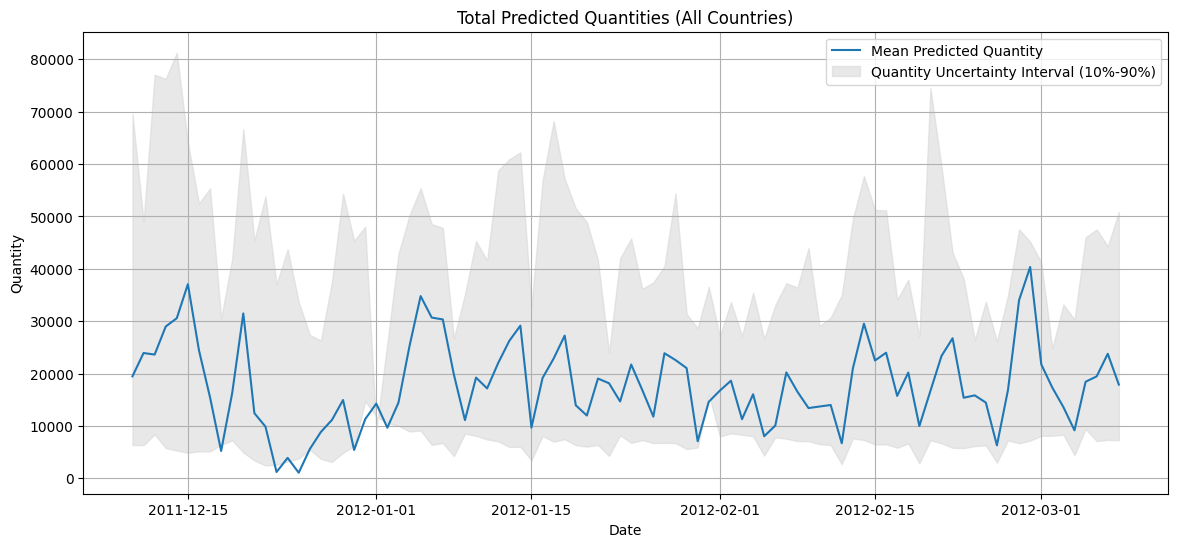

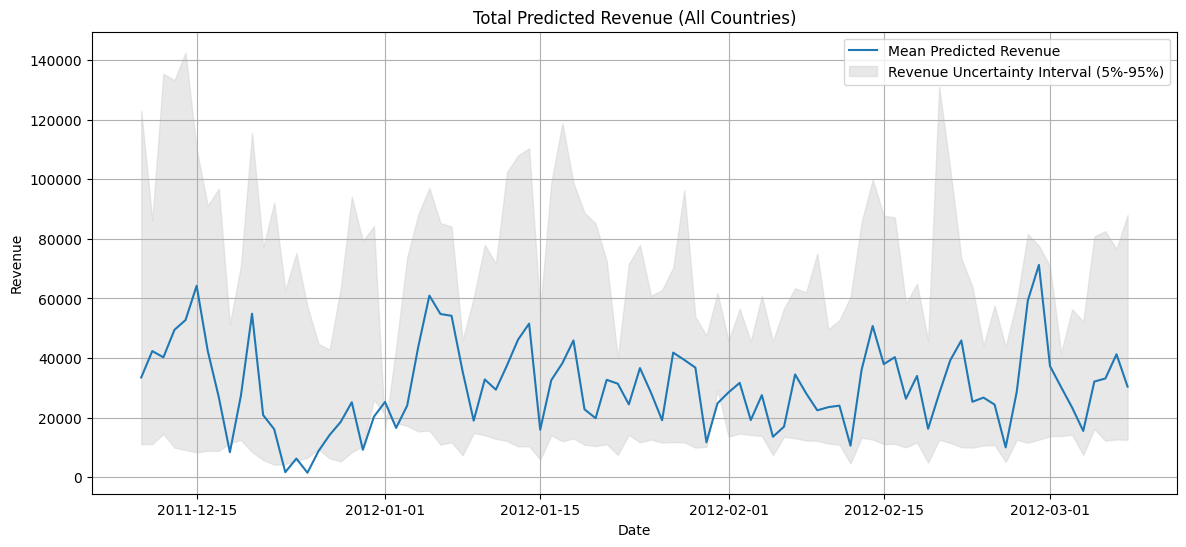

In [ ]:
#here i use three seperate models for mean prediction and for calculating the 10% and 90% quantiles

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonthDay'] = df['InvoiceDate'].dt.to_period('D').dt.to_timestamp()
df['Revenue'] = df['Quantity'] * df['UnitPrice']
country_counting = df['Country'].value_counts()
separate_countries = country_counting[country_counting >= 800].index.tolist()
df['Country'] = df['Country'].apply(lambda x: x if x in separate_countries else 'Smaller_countries')
grouped2 = df.groupby(['Country', 'YearMonthDay']).agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

special_days = ['2011-12-09', '2011-01-18']  
grouped2['day_of_week'] = grouped2['YearMonthDay'].dt.dayofweek
grouped2['month'] = grouped2['YearMonthDay'].dt.month
grouped2['day_of_month'] = grouped2['YearMonthDay'].dt.day
grouped2['is_special_day'] = grouped2['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)

price_variation = df.groupby(['Country', 'YearMonthDay']).agg({
    'UnitPrice': ['mean', 'std']
}).reset_index()
price_variation.columns = ['Country', 'YearMonthDay', 'UnitPrice_Mean', 'UnitPrice_Std']
threshold = 30.0
price_variation['price_spike_flag'] = (price_variation['UnitPrice_Std'] > threshold).astype(int)
grouped2 = grouped2.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
grouped2['price_spike_flag'] = grouped2['price_spike_flag'].fillna(0)
le = LabelEncoder()
grouped2['Country_encoded'] = le.fit_transform(grouped2['Country'])

features = ['Country_encoded', 'day_of_week', 'month', 'day_of_month', 'is_special_day', 'price_spike_flag']
X = grouped2[features]
y = grouped2['Quantity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

params_mean = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 400,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': 'rmse',
    'callbacks':None #[xgb.callback.EarlyStopping(rounds=30)]
}
model = xgb.XGBRegressor(**params_mean)
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

params_lower = params_mean.copy()
params_lower.update({'objective': 'reg:quantileerror', 'quantile_alpha': 0.05})
model_lower = xgb.XGBRegressor(**params_lower)
model_lower.fit(X_train, y_train, verbose=True)

params_upper = params_mean.copy()
params_upper.update({'objective': 'reg:quantileerror', 'quantile_alpha': 0.95})
model_upper = xgb.XGBRegressor(**params_upper)
model_upper.fit(X_train, y_train, verbose=True)

# 8. Build future dates
future_dates = pd.date_range(start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1), periods=90)
countries = grouped2['Country'].dropna().unique()

future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)

future['day_of_week'] = future['YearMonthDay'].dt.dayofweek
future['month'] = future['YearMonthDay'].dt.month
future['day_of_month'] = future['YearMonthDay'].dt.day
future['is_special_day'] = future['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
future = future.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
future['price_spike_flag'] = future['price_spike_flag'].fillna(0)
future['Country_encoded'] = le.transform(future['Country'])

X_future = future[features]
future['Predicted_Quantity'] = model.predict(X_future)
future['Predicted_Lower'] = model_lower.predict(X_future)
future['Predicted_Upper'] = model_upper.predict(X_future)

future['Predicted_Quantity'] = future['Predicted_Quantity'].clip(lower=0)
future['Predicted_Lower'] = future['Predicted_Lower'].clip(lower=0)
future['Predicted_Upper'] = future['Predicted_Upper'].clip(lower=0)


avg_price_per_country = df.groupby('Country').apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).to_dict()
future['avg_price'] = future['Country'].map(avg_price_per_country)

future['Predicted_Revenue'] = future['Predicted_Quantity'] * future['avg_price']
future['Predicted_Revenue_Lower'] = future['Predicted_Lower'] * future['avg_price']
future['Predicted_Revenue_Upper'] = future['Predicted_Upper'] * future['avg_price']


daily_forecast = future.groupby('YearMonthDay').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum',
    'Predicted_Revenue': 'sum',
    'Predicted_Revenue_Lower': 'sum',
    'Predicted_Revenue_Upper': 'sum'
}).reset_index()


plt.figure(figsize=(14,6))
plt.plot(daily_forecast['YearMonthDay'], daily_forecast['Predicted_Quantity'], label='Mean Predicted Quantity')
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Lower'],
                 daily_forecast['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Quantity Uncertainty Interval (10%-90%)')
plt.title('Total Predicted Quantities (All Countries)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(daily_forecast['YearMonthDay'], daily_forecast['Predicted_Revenue'], label='Mean Predicted Revenue')
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Revenue_Lower'],
                 daily_forecast['Predicted_Revenue_Upper'],
                 color='lightgray', alpha=0.5, label='Revenue Uncertainty Interval (5%-95%)')
plt.title('Total Predicted Revenue (All Countries)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()


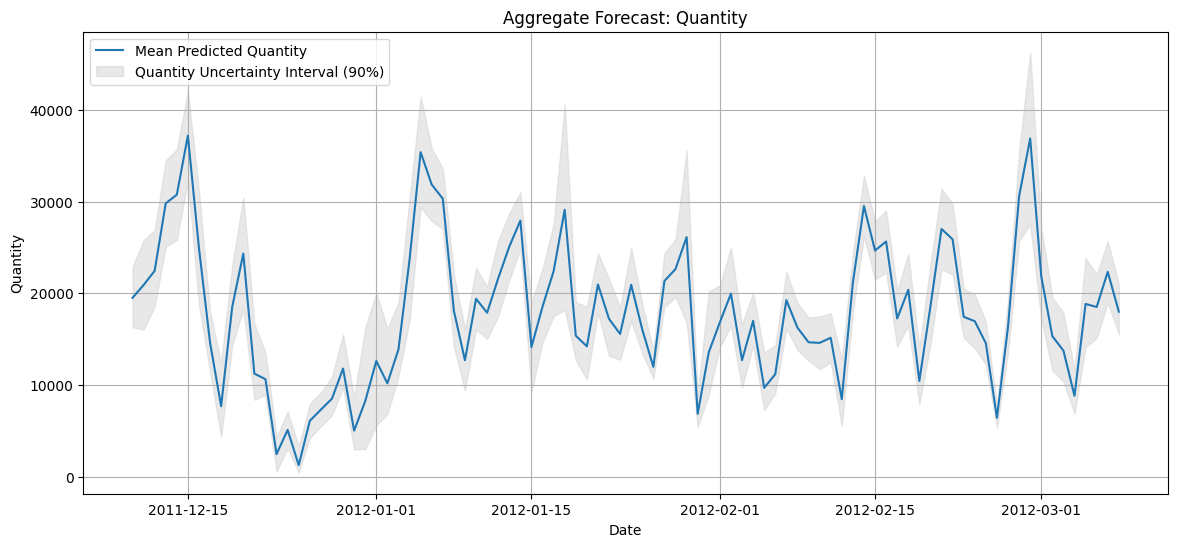

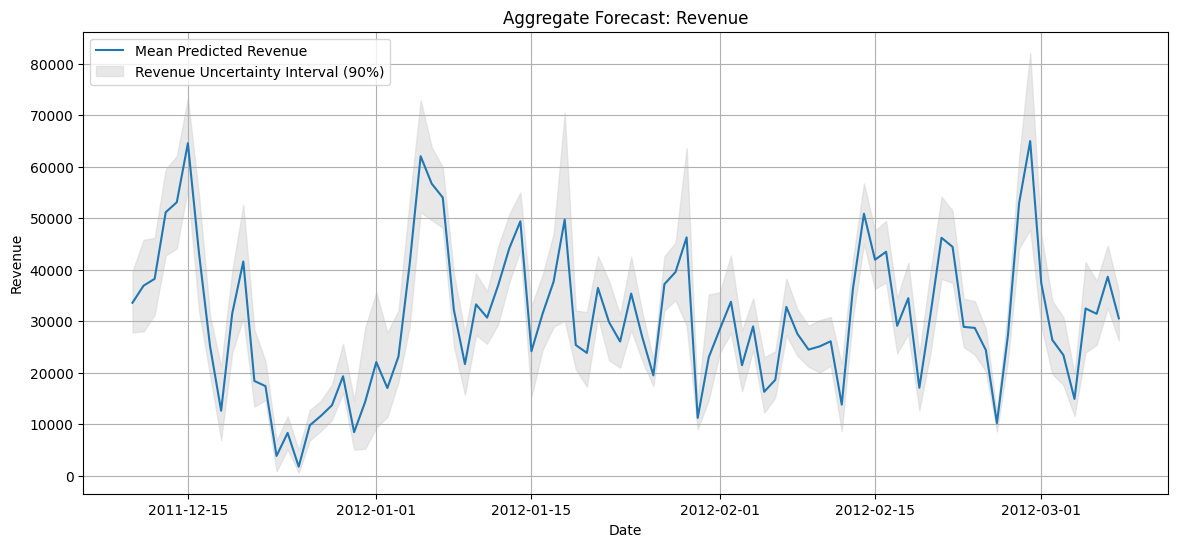

In [ ]:
#here I quantify the uncertainty through model averaging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

file_path = '/Users/leonidastaliadouros/Documents/Datathon/cleaned_data.csv'
df = pd.read_csv(file_path)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonthDay'] = df['InvoiceDate'].dt.to_period('D').dt.to_timestamp()
df['Revenue'] = df['Quantity'] * df['UnitPrice']
country_counting = df['Country'].value_counts()
separate_countries = country_counting[country_counting >= 800].index.tolist()
df['Country'] = df['Country'].apply(lambda x: x if x in separate_countries else 'Smaller_countries')

grouped2 = df.groupby(['Country', 'YearMonthDay']).agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

special_days = ['2011-12-09', '2011-01-18']  
grouped2['day_of_week'] = grouped2['YearMonthDay'].dt.dayofweek
grouped2['month'] = grouped2['YearMonthDay'].dt.month
grouped2['day_of_month'] = grouped2['YearMonthDay'].dt.day
grouped2['is_special_day'] = grouped2['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
price_variation = df.groupby(['Country', 'YearMonthDay']).agg({
    'UnitPrice': ['mean', 'std']
}).reset_index()
price_variation.columns = ['Country', 'YearMonthDay', 'UnitPrice_Mean', 'UnitPrice_Std']
threshold = 30.0
price_variation['price_spike_flag'] = (price_variation['UnitPrice_Std'] > threshold).astype(int)

grouped2 = grouped2.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
grouped2['price_spike_flag'] = grouped2['price_spike_flag'].fillna(0)

le = LabelEncoder()
grouped2['Country_encoded'] = le.fit_transform(grouped2['Country'])
features = ['Country_encoded', 'day_of_week', 'month', 'day_of_month', 'is_special_day', 'price_spike_flag']
X = grouped2[features]
y = grouped2['Quantity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

future_dates = pd.date_range(start=grouped2['YearMonthDay'].max() + pd.Timedelta(days=1), periods=90)
countries = grouped2['Country'].dropna().unique()

future_list = []
for country in countries:
    temp = pd.DataFrame({
        'Country': [country] * len(future_dates),
        'YearMonthDay': future_dates
    })
    future_list.append(temp)

future = pd.concat(future_list).reset_index(drop=True)

future['day_of_week'] = future['YearMonthDay'].dt.dayofweek
future['month'] = future['YearMonthDay'].dt.month
future['day_of_month'] = future['YearMonthDay'].dt.day
future['is_special_day'] = future['YearMonthDay'].isin(pd.to_datetime(special_days)).astype(int)
future = future.merge(price_variation[['Country', 'YearMonthDay', 'price_spike_flag']], on=['Country', 'YearMonthDay'], how='left')
future['price_spike_flag'] = future['price_spike_flag'].fillna(0)
future['Country_encoded'] = le.transform(future['Country'])

X_future = future[features]

n_models = 100
models = []
params_mean = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.05,
    'n_estimators': 300,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

for i in range(n_models):
    model = xgb.XGBRegressor(**params_mean, seed=i*10)
    model.fit(X_train, y_train)
    models.append(model)

predictions = np.array([model.predict(X_future) for model in models])
pred_mean = predictions.mean(axis=0)
pred_std = predictions.std(axis=0)

pred_lower = pred_mean - 1.64 * pred_std
pred_upper = pred_mean + 1.64 * pred_std

future['Predicted_Quantity'] = np.clip(pred_mean, 0, None)
future['Predicted_Lower'] = np.clip(pred_lower, 0, None)
future['Predicted_Upper'] = np.clip(pred_upper, 0, None)

avg_price_per_country = df.groupby('Country').apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).to_dict()
future['avg_price'] = future['Country'].map(avg_price_per_country)

future['Predicted_Revenue'] = future['Predicted_Quantity'] * future['avg_price']
future['Predicted_Revenue_Lower'] = future['Predicted_Lower'] * future['avg_price']
future['Predicted_Revenue_Upper'] = future['Predicted_Upper'] * future['avg_price']

daily_forecast = future.groupby('YearMonthDay').agg({
    'Predicted_Quantity': 'sum',
    'Predicted_Lower': 'sum',
    'Predicted_Upper': 'sum',
    'Predicted_Revenue': 'sum',
    'Predicted_Revenue_Lower': 'sum',
    'Predicted_Revenue_Upper': 'sum'
}).reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_forecast['YearMonthDay'], daily_forecast['Predicted_Quantity'], label='Mean Predicted Quantity')
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Lower'],
                 daily_forecast['Predicted_Upper'],
                 color='lightgray', alpha=0.5, label='Quantity Uncertainty Interval (90%)')
plt.title('Aggregate Forecast: Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(daily_forecast['YearMonthDay'], daily_forecast['Predicted_Revenue'], label='Mean Predicted Revenue')
plt.fill_between(daily_forecast['YearMonthDay'],
                 daily_forecast['Predicted_Revenue_Lower'],
                 daily_forecast['Predicted_Revenue_Upper'],
                 color='lightgray', alpha=0.5, label='Revenue Uncertainty Interval (90%)')
plt.title('Aggregate Forecast: Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()


In [25]:
print(grouped2['Quantity'].describe())


count     1428.000000
mean      3628.638655
std       6972.109592
min          1.000000
25%        213.750000
50%        533.500000
75%       2795.000000
max      87167.000000
Name: Quantity, dtype: float64
